# Original Code

Customer 1 arrives at 0.20 min.
Customer 1 starts service after waiting 0.00 min.
Customer 2 arrives at 0.21 min.
Customer 2 starts service after waiting 0.00 min.
Customer 1 finished service at 0.25 min.
Customer 3 arrives at 0.26 min.
Customer 3 starts service after waiting 0.00 min.
Customer 2 finished service at 0.40 min.
Customer 4 arrives at 0.49 min.
Customer 4 starts service after waiting 0.00 min.
Customer 5 arrives at 0.50 min.
Customer 6 arrives at 0.51 min.
Customer 7 arrives at 0.56 min.
Customer 4 finished service at 0.56 min.
Customer 5 starts service after waiting 0.06 min.
Customer 5 finished service at 0.57 min.
Customer 6 starts service after waiting 0.06 min.
Customer 3 finished service at 0.58 min.
Customer 7 starts service after waiting 0.02 min.
Customer 6 finished service at 0.60 min.
Customer 8 arrives at 0.70 min.
Customer 8 starts service after waiting 0.00 min.
Customer 7 finished service at 0.73 min.
Customer 8 finished service at 0.74 min.
Customer 9 arriv

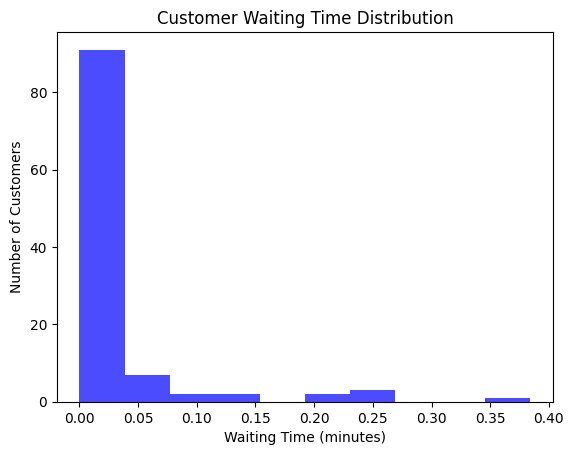

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import simpy # import simpy here

# Simulation Parameters
RANDOM_SEED = 42
NUM_TELLERS = 2      # Number of bank tellers
ARRIVAL_RATE = 5      # Average arrival rate (customers per minute)
SERVICE_RATE = 7      # Average service rate (customers served per minute)
SIM_TIME = 20        # Total simulation time in minutes

# Store waiting times
wait_times = []

class BankQueueSimulation:
    def __init__(self, env, num_tellers, service_rate):
        self.env = env
        self.teller = simpy.Resource(env, num_tellers)  # Bank tellers
        self.service_rate = service_rate

    def serve_customer(self, customer_id):
        """Simulate service process for a customer"""
        service_time = random.expovariate(self.service_rate)
        yield self.env.timeout(service_time)
        print(f"Customer {customer_id} finished service at {self.env.now:.2f} min.")

def customer_process(env, customer_id, bank):
    """Simulates a customer entering the queue"""
    arrival_time = env.now
    print(f"Customer {customer_id} arrives at {arrival_time:.2f} min.")

    with bank.teller.request() as request:
        yield request  # Wait for an available teller
        wait_time = env.now - arrival_time  # Compute waiting time
        wait_times.append(wait_time)

        print(f"Customer {customer_id} starts service after waiting {wait_time:.2f} min.")
        yield env.process(bank.serve_customer(customer_id))

def customer_arrivals(env, bank, arrival_rate):
    """Generate customers at random arrival intervals"""
    customer_id = 0
    while True:
        yield env.timeout(random.expovariate(arrival_rate))  # Time until next arrival
        customer_id += 1
        env.process(customer_process(env, customer_id, bank))

# Run Simulation
random.seed(RANDOM_SEED)
env = simpy.Environment()
bank = BankQueueSimulation(env, NUM_TELLERS, SERVICE_RATE)
env.process(customer_arrivals(env, bank, ARRIVAL_RATE))
env.run(until=SIM_TIME)

# Performance Analysis
print("\n=== Simulation Summary ===")
print(f"Average Wait Time: {np.mean(wait_times):.2f} minutes")

# Visualization
plt.hist(wait_times, bins=10, color="blue", alpha=0.7)
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Number of Customers")
plt.title("Customer Waiting Time Distribution")
plt.show()


# Modified Code

Customer 1 (VIP) arrives at 0.10 min.
Customer 1 (VIP) starts service after waiting 0.00 min.
Customer 2 (Regular) arrives at 0.13 min.
Customer 2 (Regular) starts service after waiting 0.00 min.
Customer 1 finished service at 0.14 min.
Customer 3 (VIP) arrives at 0.25 min.
Customer 3 (VIP) starts service after waiting 0.00 min.
Customer 3 finished service at 0.25 min.
Customer 4 (Regular) arrives at 0.30 min.
Customer 4 (Regular) starts service after waiting 0.00 min.
Customer 4 finished service at 0.31 min.
Customer 5 (Regular) arrives at 0.37 min.
Customer 5 (Regular) starts service after waiting 0.00 min.
Customer 2 finished service at 0.45 min.
Customer 6 (Regular) arrives at 0.48 min.
Customer 6 (Regular) starts service after waiting 0.00 min.
Customer 5 finished service at 0.48 min.
Customer 7 (VIP) arrives at 0.57 min.
Customer 7 (VIP) starts service after waiting 0.00 min.
Customer 6 finished service at 0.71 min.
Customer 8 (Regular) arrives at 0.73 min.
Customer 8 (Regular) s

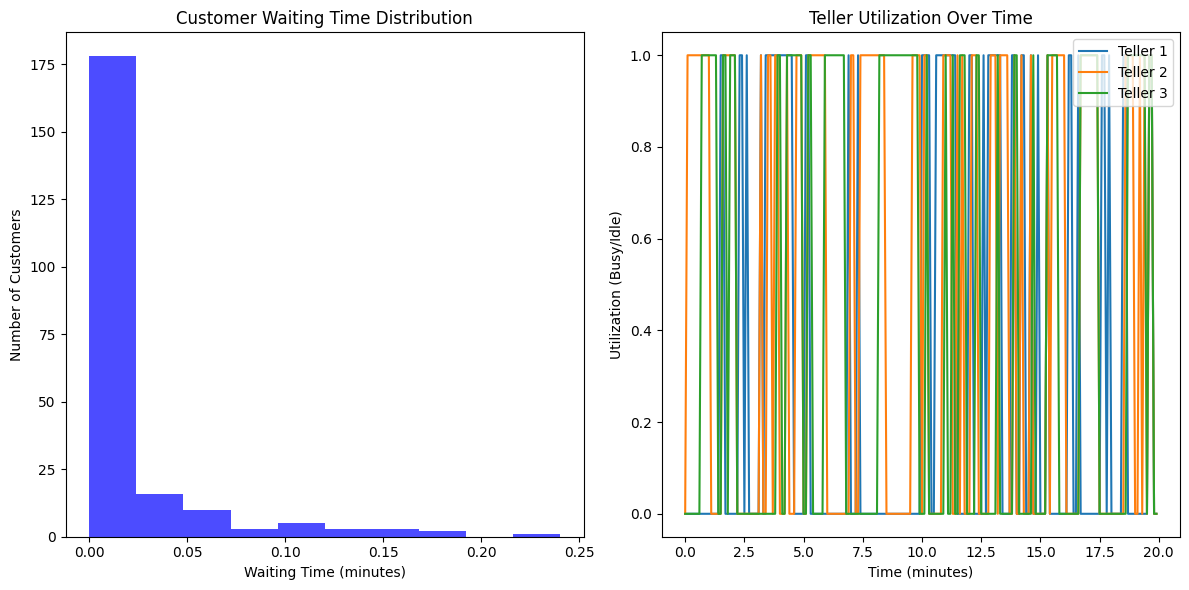

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
import simpy

# Simulation Parameters
RANDOM_SEED = 42
NUM_TELLERS = 3      # Modify the number of tellers
ARRIVAL_RATE = 10     # Customers per minute (peak hour rate)
SERVICE_RATE = 7      # Customers served per minute
SIM_TIME = 20         # Total simulation time in minutes

# Store waiting times and teller utilization
wait_times = []

class BankQueueSimulation:
    def __init__(self, env, num_tellers, service_rate):
        self.env = env
        self.teller = simpy.PriorityResource(env, num_tellers)  # Priority Resource
        self.service_rate = service_rate
        self.teller_usage = {teller_id: [] for teller_id in range(num_tellers)}  # Track usage for each teller

    def serve_customer(self, customer_id, teller_id):
        """Simulate service process for a customer"""
        service_time = random.expovariate(self.service_rate)
        start_time = self.env.now
        yield self.env.timeout(service_time)
        end_time = self.env.now
        self.teller_usage[teller_id].append((start_time, end_time))  # Log busy times for teller
        print(f"Customer {customer_id} finished service at {self.env.now:.2f} min.")

def customer_process(env, customer_id, bank, priority):
    """Simulates a customer entering the queue with priority"""
    arrival_time = env.now
    customer_type = "VIP" if priority == 0 else "Regular"
    print(f"Customer {customer_id} ({customer_type}) arrives at {arrival_time:.2f} min.")

    with bank.teller.request(priority=priority) as request:
        yield request  # Wait for an available teller

        wait_time = env.now - arrival_time  # Compute waiting time
        wait_times.append(wait_time)

        teller_id = bank.teller.count - 1  # Get the teller that served this customer
        print(f"Customer {customer_id} ({customer_type}) starts service after waiting {wait_time:.2f} min.")
        yield env.process(bank.serve_customer(customer_id, teller_id))

def customer_arrivals(env, bank, arrival_rate, peak_start, peak_end):
    """Generate customers with a priority queue (VIP customers first)"""
    customer_id = 0
    while True:
        # Adjust arrival rate for peak hours based on the base arrival rate
        if peak_start <= env.now <= peak_end:
            current_arrival_rate = arrival_rate * 1.5  # Increased rate during peak hours (50% more)
        else:
            current_arrival_rate = arrival_rate  # Use the base arrival rate

        yield env.timeout(random.expovariate(current_arrival_rate))  # Time until next arrival
        customer_id += 1

        # 10% chance of being a VIP (priority = 0), others are regular (priority = 1)
        priority = 0 if random.random() < 0.1 else 1
        env.process(customer_process(env, customer_id, bank, priority))


# Run Simulation
random.seed(RANDOM_SEED)
env = simpy.Environment()
bank = BankQueueSimulation(env, NUM_TELLERS, SERVICE_RATE)
env.process(customer_arrivals(env, bank, ARRIVAL_RATE, peak_start=5, peak_end=10))  # Peak hour between 5 and 10 minutes
env.run(until=SIM_TIME)

# Performance Analysis
print("\n=== Simulation Summary ===")
print("\nSimulation Parameters:")
print(f"Number of Tellers: {NUM_TELLERS}")
print(f"Arrival Rate: {ARRIVAL_RATE} customers per minute")
print(f"Service Rate: {SERVICE_RATE} customers per minute")
print(f"Simulation Time: {SIM_TIME} minutes")
print(f"Average Wait Time: {np.mean(wait_times):.2f} minutes")

# Visualization of Teller Utilization Over Time
# Create time intervals for utilization visualization
time_points = np.arange(0, SIM_TIME, 0.1)  # Time intervals for visualization
teller_utilization = np.zeros((NUM_TELLERS, len(time_points)))  # Empty matrix for utilization

# For each teller, calculate busy and idle times
for teller_id, busy_times in bank.teller_usage.items():
    for start_time, end_time in busy_times:
        start_index = int(start_time / 0.1)  # Find the index for the start time
        end_index = int(end_time / 0.1)      # Find the index for the end time
        teller_utilization[teller_id, start_index:end_index] = 1  # Mark as busy

# Plot results
plt.figure(figsize=(12, 6))

# Waiting Time Distribution
plt.subplot(1, 2, 1)
plt.hist(wait_times, bins=10, color="blue", alpha=0.7)
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Number of Customers")
plt.title("Customer Waiting Time Distribution")

# Teller Utilization Over Time
plt.subplot(1, 2, 2)
for teller_id in range(NUM_TELLERS):
    plt.plot(time_points, teller_utilization[teller_id], label=f"Teller {teller_id + 1}")
plt.xlabel("Time (minutes)")
plt.ylabel("Utilization (Busy/Idle)")
plt.title("Teller Utilization Over Time")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()
